# Abalone Age Prediction

 Predicting the age of abalone from physical measurements. The age of abalone is
determined by cutting the shell through the cone, staining it, and counting the number of rings through
a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain,
are used to predict age. Further information, such as weather patterns and location (hence food
availability) may be required to solve the problem.


In [1]:
import warnings
warnings.filterwarnings('ignore')

# Load the dataset into the tool.

In [2]:
import pandas as pd
import statsmodels.api as sm
file=pd.read_csv("C:/Users/deepika sakthivel/Downloads/abalone.csv")
df=pd.DataFrame(file)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.shape

(4177, 9)

# 2. Univariate Analysis

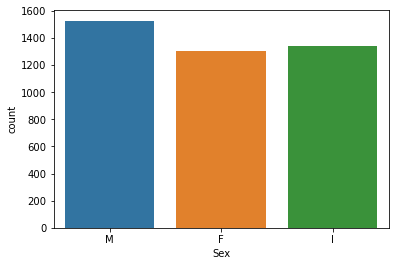

In [4]:
import seaborn as sns
sns.countplot(x=df['Sex'])

Count plot of sex --->Male count is higher than female and infant

# 2. Bi-Variate Analysis

Text(0.5, 0, 'Rings')

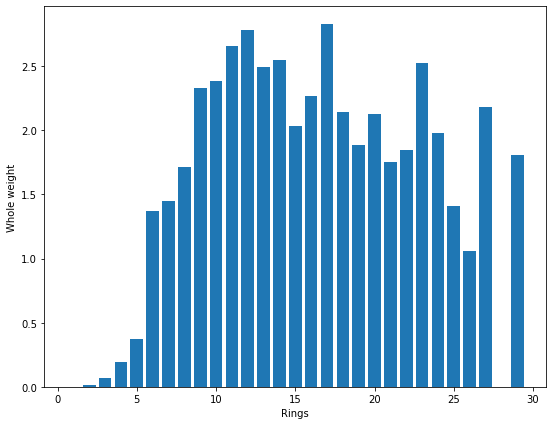

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize= (9,7))
plt.bar(df['Rings'],df['Whole weight'])

plt.ylabel("Whole weight")
plt.xlabel("Rings")


# 3.Multi-Variate Analysis

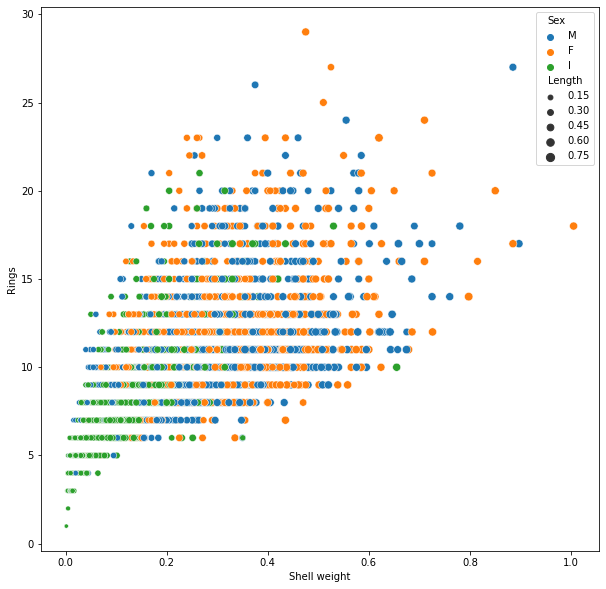

In [6]:
fig=plt.figure(figsize=(10,10))
sns.scatterplot(data=df,hue='Sex',y='Rings',size='Length',x='Shell weight')

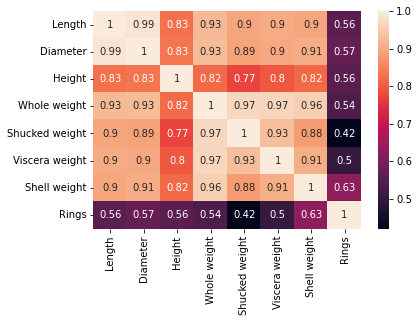

In [7]:
sns.heatmap(df.corr(),annot=True)

# 4.Perform descriptive statistics on the dataset.

In [8]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
df.mean()

Length            0.523992
Diameter          0.407881
Height            0.139516
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64

In [10]:
df.std()

Length            0.120093
Diameter          0.099240
Height            0.041827
Whole weight      0.490389
Shucked weight    0.221963
Viscera weight    0.109614
Shell weight      0.139203
Rings             3.224169
dtype: float64

In [11]:
df.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,9.0
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 5. Check for Missing values and deal with them

In [12]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# There is no missing value

# 6. Find the outliers and replace them outliers

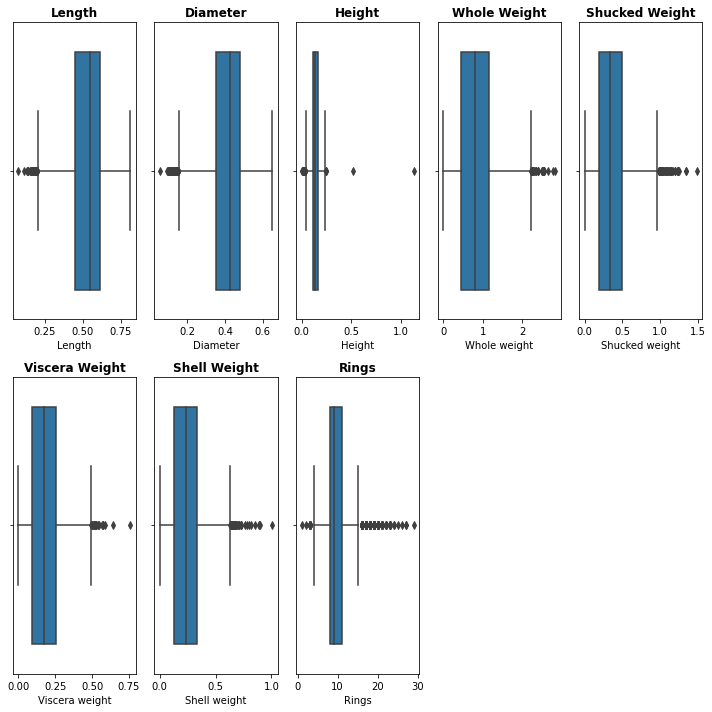

In [13]:
plt.figure(figsize=(10,10))
for n,column in enumerate(df.describe().columns):
  plt.subplot(2,5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [18]:
q=df.quantile(q=[0.25,0.75])

q

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,8.0
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,11.0


In [19]:
iqr=q.loc[0.75]-q.loc[0.25] 
iqr

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
dtype: float64

In [20]:
l=q.loc[0.25]-(1.5*iqr)
l

Length            0.20250
Diameter          0.15500
Height            0.04000
Whole weight     -0.62575
Shucked weight   -0.28800
Viscera weight   -0.14575
Shell weight     -0.16850
Rings             3.50000
dtype: float64

In [21]:
u=q.loc[0.75]+(1.5*iqr)
u

Length             0.86250
Diameter           0.67500
Height             0.24000
Whole weight       2.22025
Shucked weight     0.97600
Viscera weight     0.49225
Shell weight       0.62750
Rings             15.50000
dtype: float64

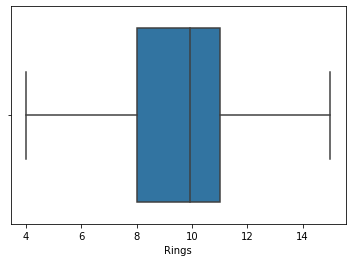

In [22]:
df['Rings']=np.where(df['Rings']>15.5,9.933684,df['Rings'])
df['Rings']=np.where(df['Rings']<3.5,9.933684,df['Rings'])
sns.boxplot(x=df['Rings'])

# 7. Check for Categorical columns and perform encoding.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [24]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [25]:
df['Sex'].replace({'I':2,'M':1,'F':0},inplace=True)


In [26]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


In [27]:
for i in df:
    if df[i].dtype==object:
        from sklearn.preprocessing import LabelEncoder
        label=LabelEncoder()
        df[i]=label.fit_transform(df[i])

# 8. Split the data into dependent and independent variables

In [28]:
x = df.drop('Rings',axis=1)
y = df['Rings']

In [29]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [30]:
y

0       15.0
1        7.0
2        9.0
3       10.0
4        7.0
        ... 
4172    11.0
4173    10.0
4174     9.0
4175    10.0
4176    12.0
Name: Rings, Length: 4177, dtype: float64

# 9. Scale the independent variable

In [45]:
from sklearn.preprocessing import scale
x=scale(x)
x

array([[-0.0105225 , -0.57455813, -0.5018095 , ..., -0.60768536,
        -0.72621157, -0.63821689],
       [-0.0105225 , -1.44898585, -1.57305799, ..., -1.17090984,
        -1.20522124, -1.21298732],
       [-1.26630752,  0.05003309,  0.08737717, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [-0.0105225 ,  0.6329849 ,  0.67656384, ...,  0.74855917,
         0.97541324,  0.49695471],
       [-1.26630752,  0.84118198,  0.78368869, ...,  0.77334105,
         0.73362741,  0.41073914],
       [-0.0105225 ,  1.54905203,  1.53356263, ...,  2.64099341,
         1.78744868,  1.84048058]])

# 10. Split the data into training and testing

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# 11. Build the Model


In [35]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [39]:
x_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
3141,2,0.180,0.407881,0.080,0.0330,0.0145,0.0070,0.0100
3521,2,0.215,0.407881,0.055,0.0410,0.0150,0.0090,0.0125
883,1,0.660,0.530000,0.170,1.3905,0.5905,0.2120,0.4530
3627,1,0.715,0.525000,0.200,1.8900,0.9500,0.4360,0.4305
2106,1,0.595,0.455000,0.155,1.0410,0.4160,0.2105,0.3650
...,...,...,...,...,...,...,...,...
1033,1,0.650,0.525000,0.185,1.6220,0.6645,0.3225,0.4770
3264,0,0.655,0.500000,0.140,1.1705,0.5405,0.3175,0.2850
1653,1,0.595,0.450000,0.145,0.9590,0.4630,0.2065,0.2535
2607,0,0.625,0.490000,0.165,1.1270,0.4770,0.2365,0.3185


In [40]:
y_train

3141     5.000000
3521     9.933684
883     15.000000
3627    10.000000
2106    14.000000
          ...    
1033    10.000000
3264    12.000000
1653    10.000000
2607     9.000000
2732     8.000000
Name: Rings, Length: 3341, dtype: float64

# 12. Train the Model

In [38]:
test_pred=regressor.predict(x_test)
test_pred

array([10.83314363,  8.87911977, 10.30251906,  5.65783404, 10.30007287,
       11.36695242,  8.32670659,  9.25434095,  7.98377968, 10.82464545,
        8.562528  ,  6.55410774,  8.65884552,  9.08834272,  5.80618938,
        9.72984325,  7.69471444, 11.09961896, 10.62871169,  8.1980769 ,
        7.63993853,  7.22801638,  8.57808249,  8.04365555,  9.31028669,
       10.30727433,  6.32110049, 11.01121416,  9.93712741,  9.99551365,
        7.98169856,  5.92709739, 10.93473791, 12.00318875,  7.83050693,
        8.86880729,  8.56376513,  9.85586401,  8.1635189 , 10.79921289,
       10.48069037,  9.57742049, 10.00610192, 10.1865235 , 11.20975606,
        9.08630843,  9.58255016, 11.57675568,  9.92058937,  7.9447447 ,
       10.71062795,  7.541588  ,  9.15654745, 11.27739582,  9.09047887,
        8.40420731,  6.48951993,  7.48739515,  7.640941  ,  7.34465272,
        9.9651208 ,  9.69877623, 10.13437377,  8.29814895,  7.95060194,
       10.63799032, 11.12388825, 10.97521016,  8.91016361, 11.78

# 14. Measure the performance using Metrics.

In [42]:
#Mean Absolute Error(MAE)
from sklearn.metrics import mean_absolute_error
print("MAE: ",mean_absolute_error(y_test,test_pred))

MAE:  1.3350145795204889


In [43]:
#Mean Squared Error(MSE)
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,test_pred)
print(MSE**.5)

1.7027344105939934


In [44]:
#R Squared (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,test_pred)
print("R2: ",r2)

R2:  0.4812104537380094
